## Study the changes when modifying geometry dimensions

In [23]:
import ROOT, rat
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import collections
%matplotlib inline 
sys.path.append('/home/jp/projects/python_tools')
sys.path.append('/home/jp/projects/snoplus/python_modules')
import jp_mpl as jplot
import geo_studies, rat_misc

In [24]:
reload(geo_studies)

<module 'geo_studies' from '/home/jp/projects/snoplus/python_modules/geo_studies.pyc'>

In [25]:
ratreader = None

In [129]:
def recastEndVolumes(data):
    # Replace
    for i in range(len(data['end_volume'])):
        if 'ropes' in data['end_volume'][i]:
            data['end_volume'][i] = 'snorope'
    for i in range(len(data['end_volume'])):
        if 'anchors' in data['end_volume'][i]:
            data['end_volume'][i] = 'snoav'
    
    data['end_volume'][data['end_volume'] == 'neck'] = 'snoav'
    data['end_volume'][data['end_volume'] == 'av']   = 'snoav'
    data['end_volume'][data['end_volume'] == 'inner_av'] = 'snosv'
    
    data['end_volume'][data['end_volume'] == 'NULL'] = 'snorope'
    
    # Separating the belly plates and the neck
    avphotons   = data['end_volume']=='snoav'
    neck_r      = data['end_r'] >= 6100.
    neck_cr     = np.sqrt(data['end_position'][:,0]**2 + data['end_position'][:,1]**2) < 900.
    neck_z      = data['end_position'][:,2] > 6040.
    bp_czenith  = np.abs(data['costheta_dir']) < 0.14
    ropes = data['end_volume']=='snorope'
    
    data['end_volume'][neck_z*neck_cr] = 'neck'
    data['end_volume'][avphotons*bp_czenith*neck_r] = 'equator'
    data['end_volume'][bp_czenith*neck_r*(~ropes)] = 'cavity'

    # Placing everything inside the av inner sphere in the snosv category
    snosv_radius = data['end_r'] < 5878.
    data['end_volume'][snosv_radius] = 'snosv'
    
    
    # Place everything outside the PSUP radius to the cavity
    psup_radius = 8390.
    data['end_volume'][data['end_r'] > psup_radius] = 'cavity'
    
    return data

894.425922997
6038.52734375


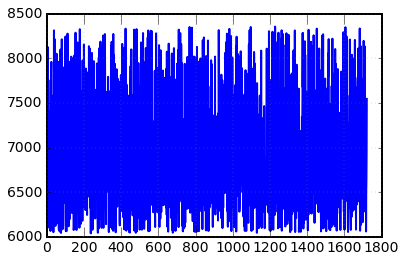

In [128]:
data               = reference
cylindrical_r      = np.sqrt(data['end_position'][:,0]**2 + data['end_position'][:,1]**2)
mybool = data['end_volume']=='neck'
#plt.plot(cylindrical_r[mybool])
print cylindrical_r[mybool].max()
plt.plot(data['end_position'][mybool, 2])
print data['end_position'][mybool, 2].min()

In [27]:
def ropeShadow(data):
    print 'Rope shadow'
    # All zenith angles
    a = dict(collections.Counter(data['end_volume']).items())
    total = len(data['end_volume'])
    outav = total - a['snoav'] - a['snosv']
    print 'Global shadowing', a['snorope']*1./outav
    
    # Only upper half
    mybool = data['costheta_dir']>0
    a = dict(collections.Counter(data['end_volume'][mybool]).items())
    total = len(data['end_volume'][mybool])
    outav = total - a['snoav'] - a['snosv']
    print 'Upper hemisphere shadowing', a['snorope']*1./outav    
    
    # Only lower half
    mybool = data['costheta_dir']<0
    a = dict(collections.Counter(data['end_volume'][mybool]).items())
    total = len(data['end_volume'][mybool])
    outav = total - a['snoav'] - a['snosv']
    print 'Lower hemisphere shadowing', a['snorope']*1./outav   

### This is the original snoplus geometry removing items NOT in native geometry<br>Ropes have been made thinner to match

In [28]:
# Opening the file
infile_dir = '/home/jp/projects/snoplus/rundir/nativegeo_tune/'
infile_dir += 'std_thinropes_heavy'
infile_name = 'pbomb380.root'
ratreader = rat_misc.openRat(infile_dir, infile_name, ratreader)
reference = geo_studies.doRead(ratreader=ratreader, max_photons = 10000000)
reference = recastEndVolumes(reference)
ropeShadow(reference)

No ratreader file. Opening it for the first time
Rope shadow
Global shadowing 0.023884191809
Upper hemisphere shadowing 0.0326056384307
Lower hemisphere shadowing 0.0151768444866


In [130]:
reference = recastEndVolumes(reference)
ropeShadow(reference)

Rope shadow
Global shadowing 0.0235100519142
Upper hemisphere shadowing 0.032019990552
Lower hemisphere shadowing 0.0149740679076


In [29]:
# Opening the file
infile_dir = '/home/jp/projects/snoplus/rundir/nativegeo_tune/'
infile_dir += 'std_thinropes_heavy'
infile_name = 'pbomb500.root'
ratreader = rat_misc.openRat(infile_dir, infile_name, ratreader)
reference500 = geo_studies.doRead(ratreader=ratreader, max_photons = 10000000)
reference500 = recastEndVolumes(reference500)
ropeShadow(reference500)

No ratreader file. Opening it for the first time
Rope shadow
Global shadowing 0.0225476487866
Upper hemisphere shadowing 0.0316327184902
Lower hemisphere shadowing 0.0135124794348


In [131]:
reference500 = recastEndVolumes(reference500)
ropeShadow(reference500)

Rope shadow
Global shadowing 0.0223657337128
Upper hemisphere shadowing 0.031330708328
Lower hemisphere shadowing 0.0134233998345


In [89]:
reload(geo_studies)

<module 'geo_studies' from '/home/jp/projects/snoplus/python_modules/geo_studies.pyc'>

Bin stats 24.6541666667 7.96777254354


(array([[ 28.,  25.,  34., ...,  38.,  23.,  28.],
        [ 26.,  32.,  29., ...,  23.,  22.,  32.],
        [ 26.,  28.,  35., ...,  24.,  32.,  19.],
        ..., 
        [ 23.,  31.,  26., ...,  30.,  24.,  25.],
        [ 30.,  33.,  34., ...,  31.,  27.,  29.],
        [ 30.,  25.,  26., ...,  27.,  29.,  16.]]),
 array([-1.57079633, -1.2532359 , -1.11976951, -1.01598529, -0.92729522,
        -0.84806208, -0.7753975 , -0.70758444, -0.64350111, -0.58236424,
        -0.52359878, -0.46676534, -0.41151685, -0.3575711 , -0.30469265,
        -0.25268026, -0.20135792, -0.15056827, -0.10016742, -0.05002086,
         0.        ,  0.05002086,  0.10016742,  0.15056827,  0.20135792,
         0.25268026,  0.30469265,  0.3575711 ,  0.41151685,  0.46676534,
         0.52359878,  0.58236424,  0.64350111,  0.70758444,  0.7753975 ,
         0.84806208,  0.92729522,  1.01598529,  1.11976951,  1.2532359 ,
         1.57079633]),
 array([-3.14159265, -3.0368729 , -2.93215314, -2.82743339, -2.72271363

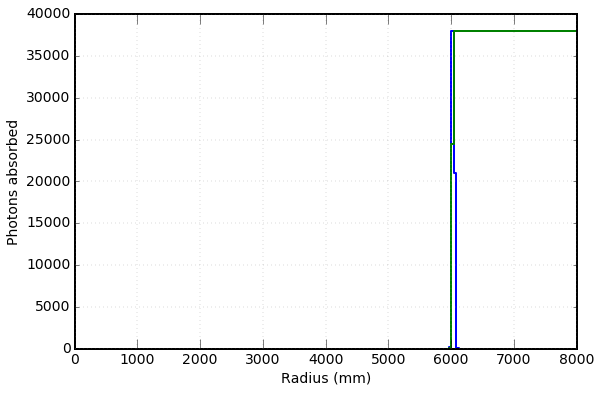

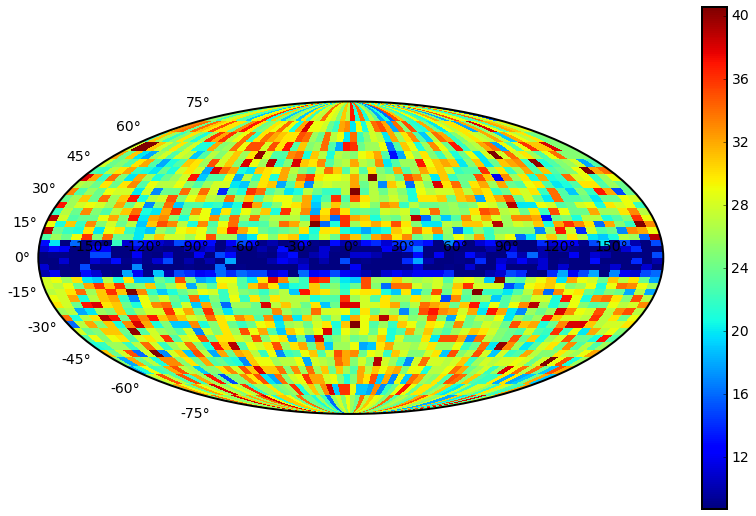

In [132]:
geo_studies.volumeAnalysis(data=reference, volume='snoav')

Bin stats 5.54883462819 8.01241415248


(array([[ 1.,  3.,  0., ...,  0.,  1.,  0.],
        [ 0.,  1.,  1., ...,  0.,  2.,  0.],
        [ 2.,  0.,  0., ...,  1.,  0.,  0.],
        ..., 
        [ 1.,  1.,  0., ...,  1.,  0.,  1.],
        [ 1.,  1.,  0., ...,  0.,  3.,  2.],
        [ 0.,  3.,  1., ...,  1.,  0.,  0.]]),
 array([-1.57079633, -1.2532359 , -1.11976951, -1.01598529, -0.92729522,
        -0.84806208, -0.7753975 , -0.70758444, -0.64350111, -0.58236424,
        -0.52359878, -0.46676534, -0.41151685, -0.3575711 , -0.30469265,
        -0.25268026, -0.20135792, -0.15056827, -0.10016742, -0.05002086,
         0.        ,  0.05002086,  0.10016742,  0.15056827,  0.20135792,
         0.25268026,  0.30469265,  0.3575711 ,  0.41151685,  0.46676534,
         0.52359878,  0.58236424,  0.64350111,  0.70758444,  0.7753975 ,
         0.84806208,  0.92729522,  1.01598529,  1.11976951,  1.2532359 ,
         1.57079633]),
 array([-3.14159265, -3.0368729 , -2.93215314, -2.82743339, -2.72271363,
        -2.61799388, -2.51327412, 

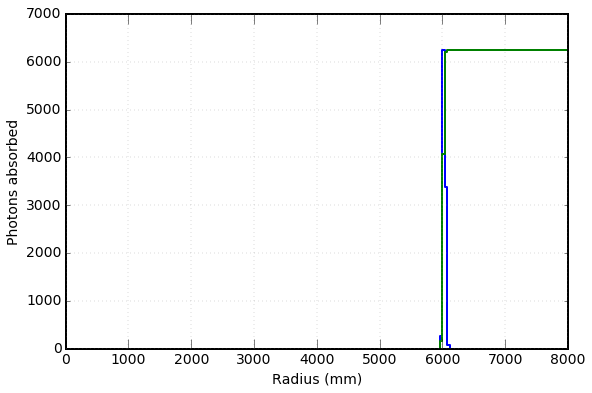

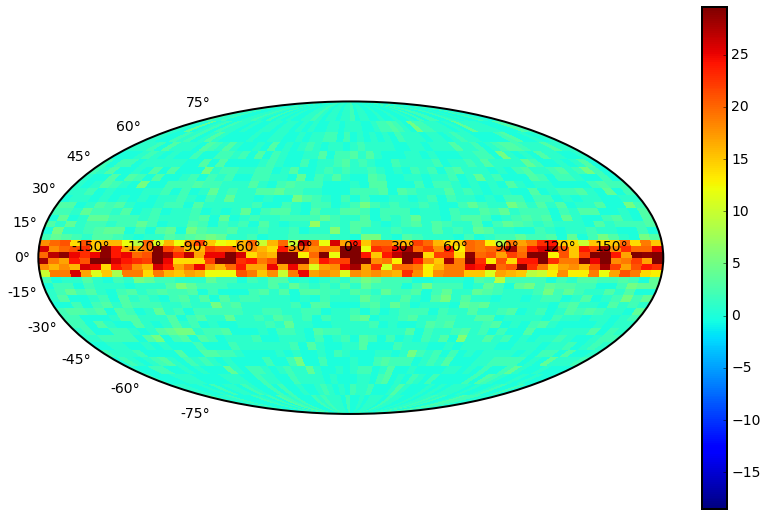

In [133]:
geo_studies.volumeAnalysis(data=reference, volume='equator', plot_nstd=3.)

Bin stats 69.8716666667 8.51734684172


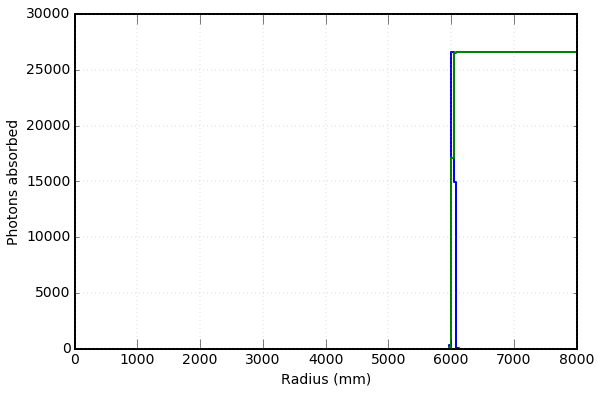

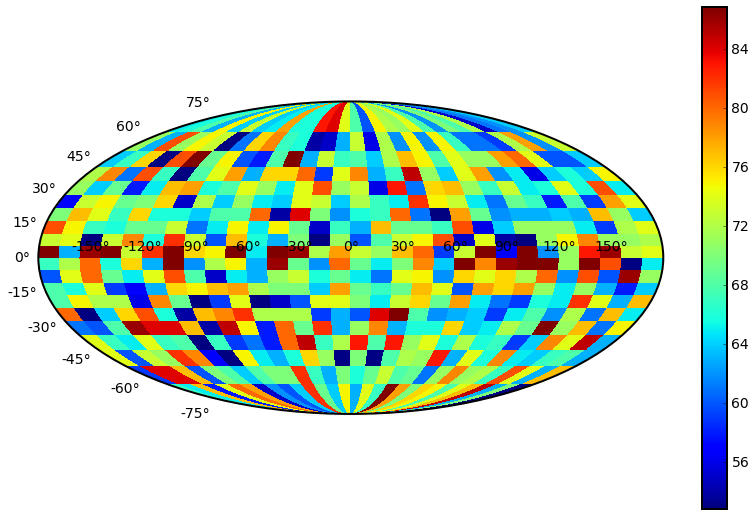

In [220]:
reload(geo_studies)
avref, x,y = geo_studies.volumeAnalysis(data=reference500, volume=['equator', 'snoav'],
                                       phi_bins=31, theta_bins=21)

Bin stats 34.4833333333 5.69353922344


(array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ..., 
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [ 39.,  43.,  37., ...,  29.,  27.,  28.]]),
 array([-1.57079633, -1.2532359 , -1.11976951, -1.01598529, -0.92729522,
        -0.84806208, -0.7753975 , -0.70758444, -0.64350111, -0.58236424,
        -0.52359878, -0.46676534, -0.41151685, -0.3575711 , -0.30469265,
        -0.25268026, -0.20135792, -0.15056827, -0.10016742, -0.05002086,
         0.        ,  0.05002086,  0.10016742,  0.15056827,  0.20135792,
         0.25268026,  0.30469265,  0.3575711 ,  0.41151685,  0.46676534,
         0.52359878,  0.58236424,  0.64350111,  0.70758444,  0.7753975 ,
         0.84806208,  0.92729522,  1.01598529,  1.11976951,  1.2532359 ,
         1.57079633]),
 array([-3.14159265, -3.0368729 , -2.93215314, -2.82743339, -2.72271363

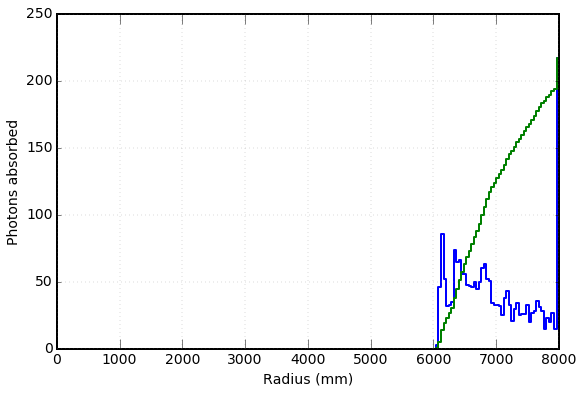

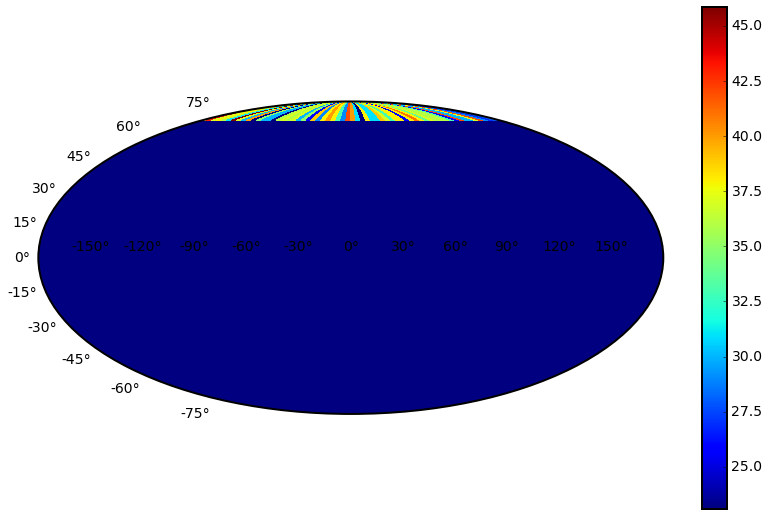

In [135]:
geo_studies.volumeAnalysis(data=reference, volume='neck', plot_nstd=2.)

Bin stats 16.2383928571 8.09670066773


(array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ..., 
        [ 32.,   0.,   0., ...,   0.,   0.,  33.],
        [ 10.,  19.,   7., ...,   6.,  23.,  13.],
        [ 24.,  24.,  33., ...,  35.,  25.,  22.]]),
 array([-1.57079633, -1.2532359 , -1.11976951, -1.01598529, -0.92729522,
        -0.84806208, -0.7753975 , -0.70758444, -0.64350111, -0.58236424,
        -0.52359878, -0.46676534, -0.41151685, -0.3575711 , -0.30469265,
        -0.25268026, -0.20135792, -0.15056827, -0.10016742, -0.05002086,
         0.        ,  0.05002086,  0.10016742,  0.15056827,  0.20135792,
         0.25268026,  0.30469265,  0.3575711 ,  0.41151685,  0.46676534,
         0.52359878,  0.58236424,  0.64350111,  0.70758444,  0.7753975 ,
         0.84806208,  0.92729522,  1.01598529,  1.11976951,  1.2532359 ,
         1.57079633]),
 array([-3.14159265, -3.0368729 , -2.93215314, -2.82743339, -2.72271363

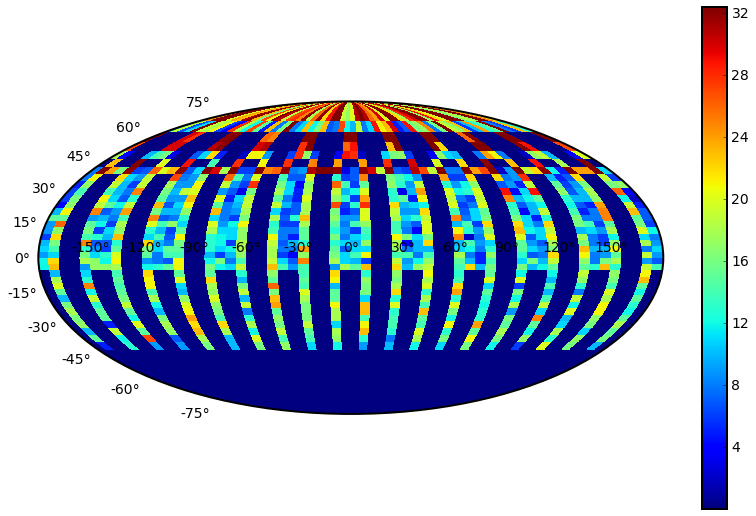

In [136]:
geo_studies.volumeAnalysis(data=reference, volume='snorope', radius_plot=False)

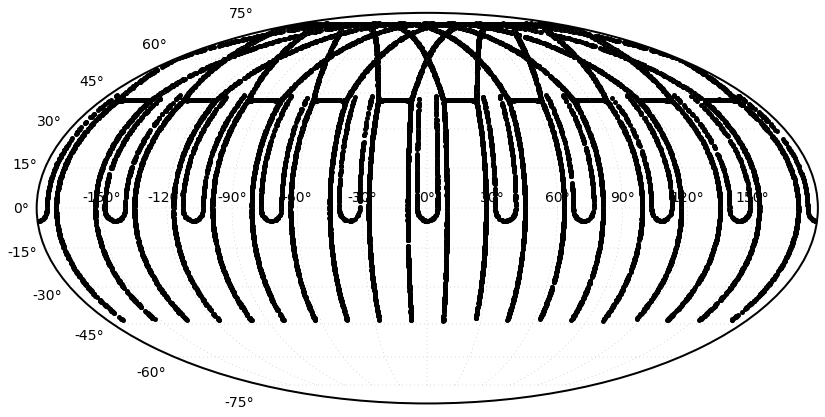

In [137]:
geo_studies.volumeAnalysis(data=reference, volume='snorope', plot_mode = 'scatter', radius_plot=False)

### Native geometry with larger av, to match size in std geo

In [9]:
# Opening the file
infile_dir = '/home/jp/projects/snoplus/rundir/nativegeo_tune/'
infile_dir += 'native_avstd_heavy'
infile_name = 'pbomb380.root'
ratreader = rat_misc.openRat(infile_dir, infile_name, ratreader)
native = geo_studies.doRead(ratreader=ratreader, max_photons = 10000000)
native = recastEndVolumes(native)
ropeShadow(native)

No ratreader file. Opening it for the first time
Rope shadow
Global shadowing 0.0239476719992
Upper hemisphere shadowing 0.033567263805
Lower hemisphere shadowing 0.0143610615932


In [138]:
native = recastEndVolumes(native)
ropeShadow(native)

Rope shadow
Global shadowing 0.023541214926
Upper hemisphere shadowing 0.0329479948414
Lower hemisphere shadowing 0.0141385014017


In [10]:
# Opening the file
infile_dir = '/home/jp/projects/snoplus/rundir/nativegeo_tune/'
infile_dir += 'native_avstd_heavy'
infile_name = 'pbomb500.root'
ratreader = rat_misc.openRat(infile_dir, infile_name, ratreader)
native500 = geo_studies.doRead(ratreader=ratreader, max_photons = 10000000)
native500 = recastEndVolumes(native500)
ropeShadow(native500)

No ratreader file. Opening it for the first time
Rope shadow
Global shadowing 0.0217239351729
Upper hemisphere shadowing 0.0305006278975
Lower hemisphere shadowing 0.0129885615487


In [139]:
native500 = recastEndVolumes(native500)
ropeShadow(native500)

Rope shadow
Global shadowing 0.0215373775119
Upper hemisphere shadowing 0.0302146624931
Lower hemisphere shadowing 0.0128872241131


In [98]:
reload(geo_studies)

<module 'geo_studies' from '/home/jp/projects/snoplus/python_modules/geo_studies.pyc'>

Bin stats 25.1683333333 7.91980621957


(array([[ 21.,  25.,  22., ...,  26.,  33.,  35.],
        [ 24.,  25.,  33., ...,  25.,  31.,  27.],
        [ 32.,  29.,  30., ...,  28.,  22.,  24.],
        ..., 
        [ 34.,  46.,  39., ...,  25.,  32.,  20.],
        [ 28.,  38.,  31., ...,  35.,  23.,  31.],
        [ 28.,  32.,  29., ...,  27.,  28.,  26.]]),
 array([-1.57079633, -1.2532359 , -1.11976951, -1.01598529, -0.92729522,
        -0.84806208, -0.7753975 , -0.70758444, -0.64350111, -0.58236424,
        -0.52359878, -0.46676534, -0.41151685, -0.3575711 , -0.30469265,
        -0.25268026, -0.20135792, -0.15056827, -0.10016742, -0.05002086,
         0.        ,  0.05002086,  0.10016742,  0.15056827,  0.20135792,
         0.25268026,  0.30469265,  0.3575711 ,  0.41151685,  0.46676534,
         0.52359878,  0.58236424,  0.64350111,  0.70758444,  0.7753975 ,
         0.84806208,  0.92729522,  1.01598529,  1.11976951,  1.2532359 ,
         1.57079633]),
 array([-3.14159265, -3.0368729 , -2.93215314, -2.82743339, -2.72271363

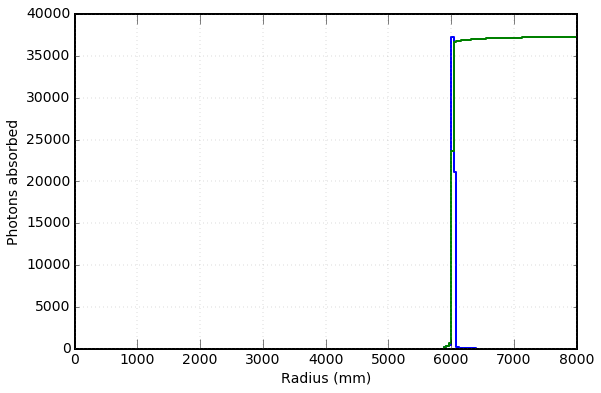

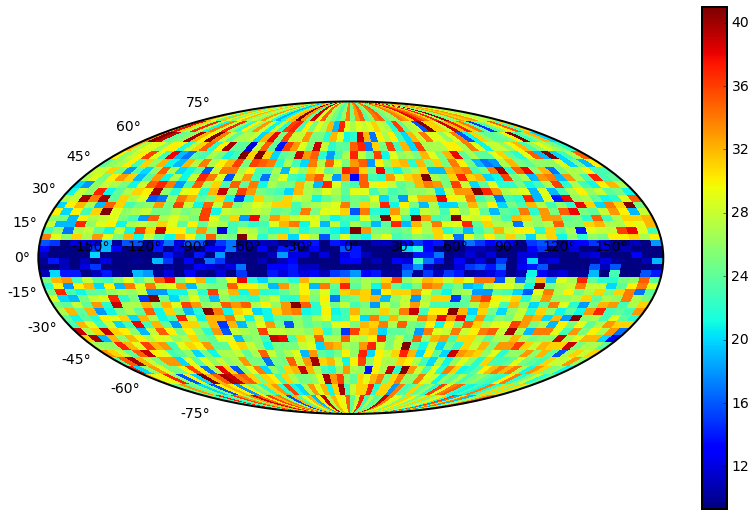

In [140]:
geo_studies.volumeAnalysis(data=native, volume='snoav')

Bin stats 6.12452002194 9.4722719158


(array([[ 0.,  0.,  1., ...,  0.,  1.,  1.],
        [ 0.,  0.,  2., ...,  1.,  1.,  1.],
        [ 0.,  0.,  0., ...,  2.,  2.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  2.,  0.],
        [ 0.,  0.,  1., ...,  0.,  1.,  2.],
        [ 0.,  1.,  0., ...,  0.,  0.,  1.]]),
 array([-1.57079633, -1.2532359 , -1.11976951, -1.01598529, -0.92729522,
        -0.84806208, -0.7753975 , -0.70758444, -0.64350111, -0.58236424,
        -0.52359878, -0.46676534, -0.41151685, -0.3575711 , -0.30469265,
        -0.25268026, -0.20135792, -0.15056827, -0.10016742, -0.05002086,
         0.        ,  0.05002086,  0.10016742,  0.15056827,  0.20135792,
         0.25268026,  0.30469265,  0.3575711 ,  0.41151685,  0.46676534,
         0.52359878,  0.58236424,  0.64350111,  0.70758444,  0.7753975 ,
         0.84806208,  0.92729522,  1.01598529,  1.11976951,  1.2532359 ,
         1.57079633]),
 array([-3.14159265, -3.0368729 , -2.93215314, -2.82743339, -2.72271363,
        -2.61799388, -2.51327412, 

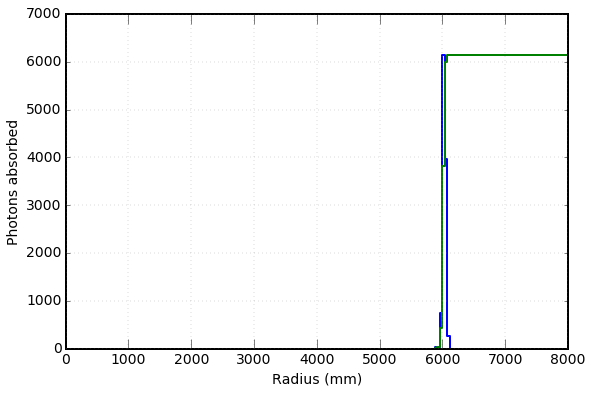

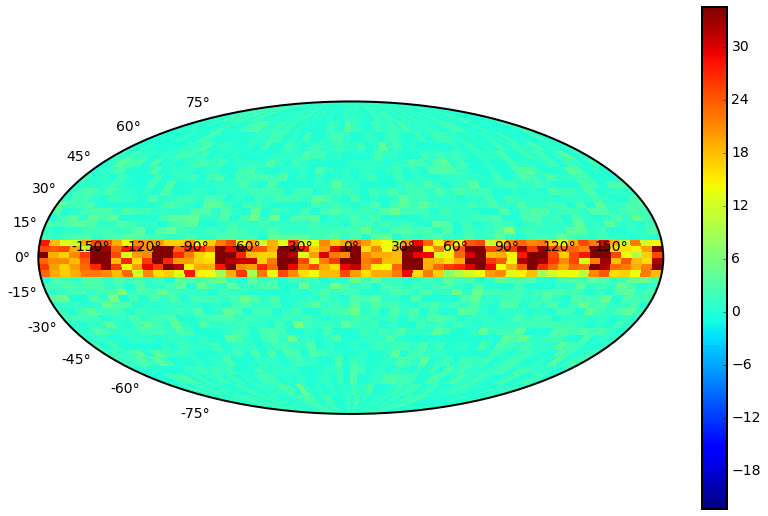

In [141]:
geo_studies.volumeAnalysis(data=native, volume='equator', plot_nstd=3.)

Bin stats 72.775 11.5266810054


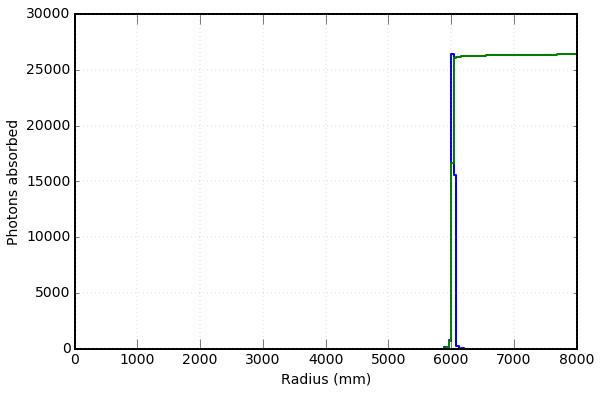

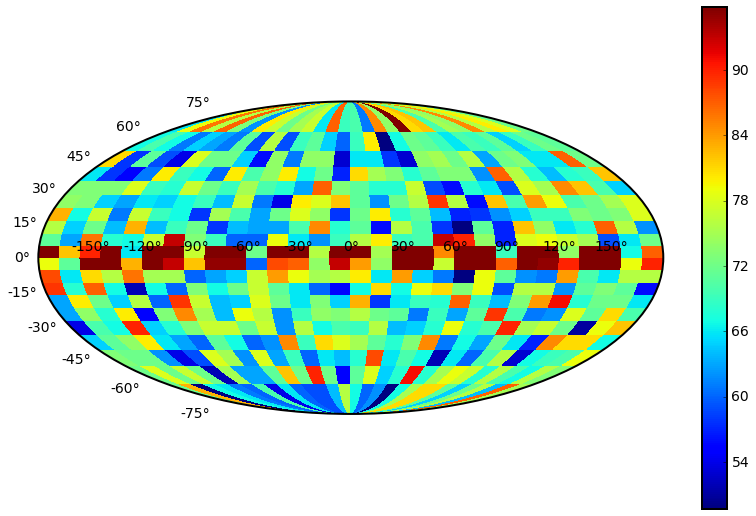

In [219]:
avnat, x, y = geo_studies.volumeAnalysis(data=native500, volume=['snoav','equator'], plot_nstd=2.,
                                        phi_bins=31, theta_bins=21)

Bin stats 14.7166666667 3.79074164541


(array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ..., 
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [ 15.,  22.,  19., ...,  10.,  13.,  16.]]),
 array([-1.57079633, -1.2532359 , -1.11976951, -1.01598529, -0.92729522,
        -0.84806208, -0.7753975 , -0.70758444, -0.64350111, -0.58236424,
        -0.52359878, -0.46676534, -0.41151685, -0.3575711 , -0.30469265,
        -0.25268026, -0.20135792, -0.15056827, -0.10016742, -0.05002086,
         0.        ,  0.05002086,  0.10016742,  0.15056827,  0.20135792,
         0.25268026,  0.30469265,  0.3575711 ,  0.41151685,  0.46676534,
         0.52359878,  0.58236424,  0.64350111,  0.70758444,  0.7753975 ,
         0.84806208,  0.92729522,  1.01598529,  1.11976951,  1.2532359 ,
         1.57079633]),
 array([-3.14159265, -3.0368729 , -2.93215314, -2.82743339, -2.72271363

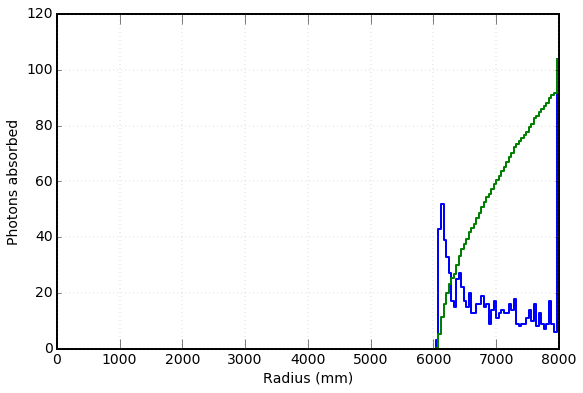

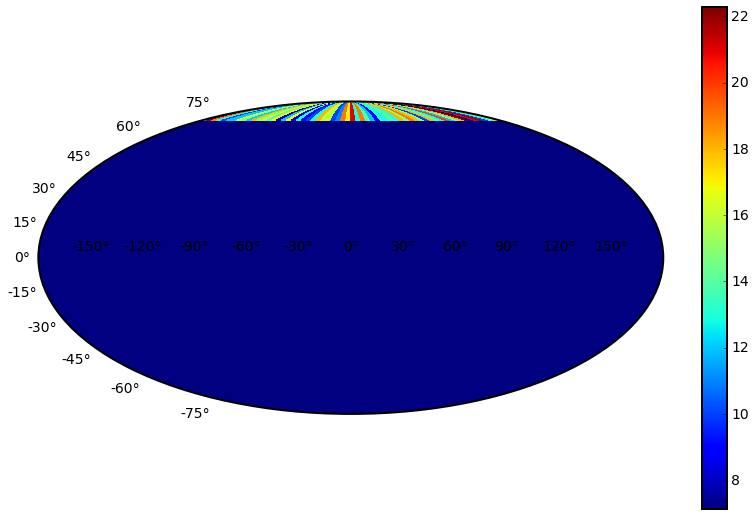

In [143]:
geo_studies.volumeAnalysis(data=native500, volume='neck')

Bin stats 16.2366071429 8.89543919593


(array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ..., 
        [ 24.,   0.,   0., ...,   0.,   0.,  32.],
        [ 16.,  25.,  12., ...,   9.,  17.,  15.],
        [ 18.,  33.,  40., ...,  38.,  32.,  35.]]),
 array([-1.57079633, -1.2532359 , -1.11976951, -1.01598529, -0.92729522,
        -0.84806208, -0.7753975 , -0.70758444, -0.64350111, -0.58236424,
        -0.52359878, -0.46676534, -0.41151685, -0.3575711 , -0.30469265,
        -0.25268026, -0.20135792, -0.15056827, -0.10016742, -0.05002086,
         0.        ,  0.05002086,  0.10016742,  0.15056827,  0.20135792,
         0.25268026,  0.30469265,  0.3575711 ,  0.41151685,  0.46676534,
         0.52359878,  0.58236424,  0.64350111,  0.70758444,  0.7753975 ,
         0.84806208,  0.92729522,  1.01598529,  1.11976951,  1.2532359 ,
         1.57079633]),
 array([-3.14159265, -3.0368729 , -2.93215314, -2.82743339, -2.72271363

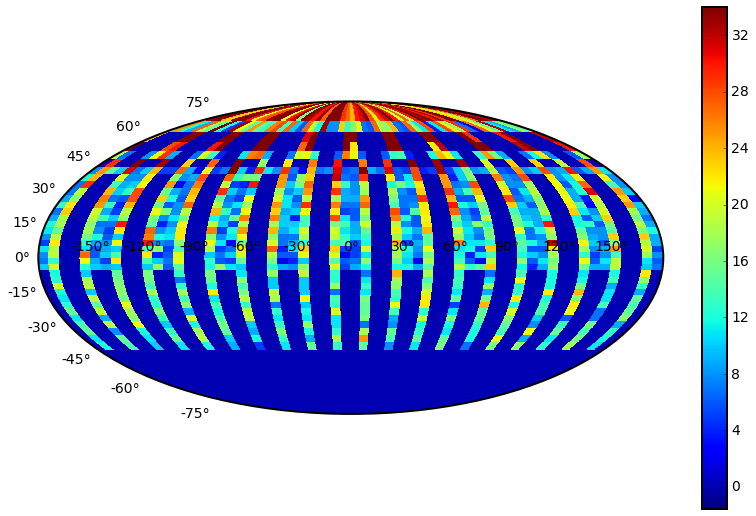

In [144]:
geo_studies.volumeAnalysis(data=native, volume='snorope', radius_plot=False)

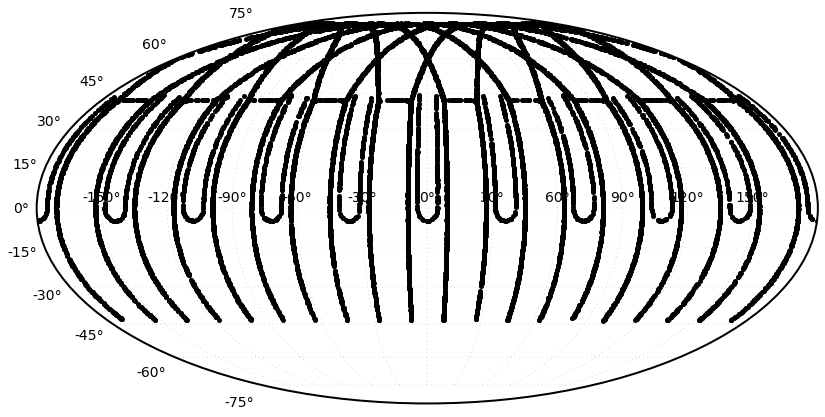

In [145]:
geo_studies.volumeAnalysis(data=native, volume='snorope', plot_mode = 'scatter', radius_plot=False)

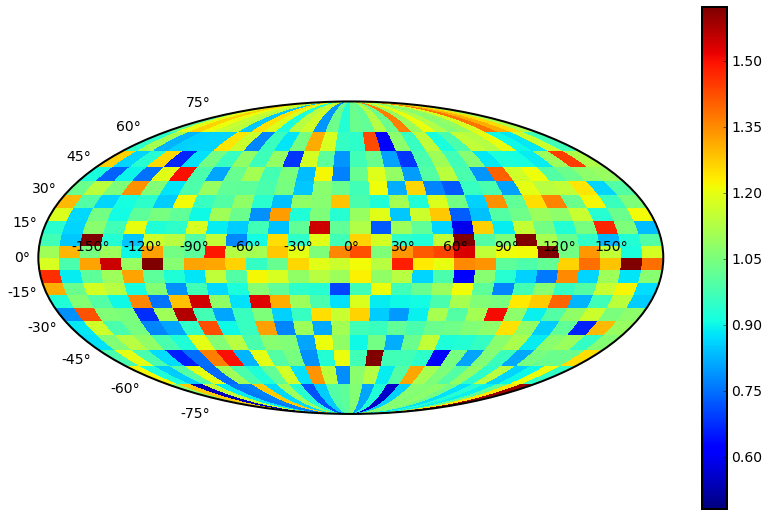

In [221]:
fig = plt.figure(figsize=(14,9))
ax  = fig.add_subplot(111, projection='mollweide')
avdiff = avnat/avref
plt.pcolor(y,x, avdiff,
          vmin = avdiff.mean()-3*avdiff.std(),
          vmax = avdiff.mean()+3*avdiff.std())
plt.colorbar()

In [167]:
outdir = '/home/jp/projects/snoplus/reports/nativegeometry/newfigs/380nm'

[ 0.99777622  1.11661166  0.70033833  1.02085516  0.99989003  1.0011394 ]
[ 1.00238153  1.01459902  1.00848485  1.00789858  0.92534344  0.94560363
  0.93717983  0.93452094  0.94970349  0.9240693   0.93056457  0.94650206
  0.9375      1.00636943  0.98        0.92251816]


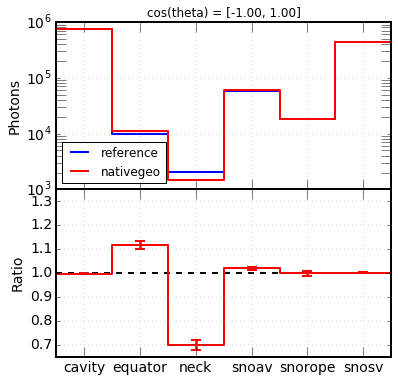

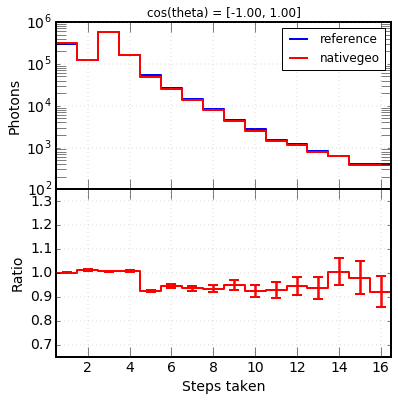

In [168]:
reload(geo_studies)
geo_studies.compareTracking(set_list = [reference, native],
                           pltlabels=['reference','nativegeo'],
                           outdir=outdir)

[ 0.9984763   1.01785714  1.02409887  0.94029851  1.00557936]
[ 1.00194224  1.00846254  1.00171449  1.0008538   1.01388495  1.0400545
  0.97238095  0.95865633  0.98773006  0.96195652  1.          0.81818182
  0.84        0.71428571  0.98148148  1.24489796]
[ 1.00139856  0.71875     1.01425538  0.91652755  1.00765302]
[ 1.00420236  1.00333626  1.00325338  1.01914922  1.00926462  0.99426073
  0.94447174  0.95644444  0.91004498  0.92227979  0.86877828  0.87283237
  1.          1.08602151  0.95714286  0.83333333]
[ 0.99915915  0.58730159  1.00869126  0.99547966  1.00215012]
[ 1.01669511  0.98541969  1.00125753  0.99697667  1.01571738  0.94524653
  0.95373494  0.95121951  0.93161094  1.03954802  0.90384615  0.98876404
  1.          0.85        0.84375     0.81818182]
[ 0.9932551   1.11661166  2.          0.95566502  0.95601277  0.9913221 ]
[ 0.9951899   1.0643624   1.04727179  1.0279811   0.60054743  0.90371139
  0.94080847  0.93052109  0.98778626  0.88997555  0.91416309  1.05128205
  0.910

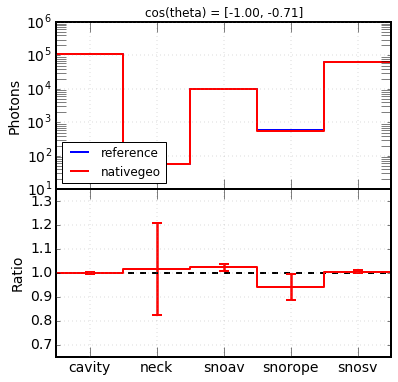

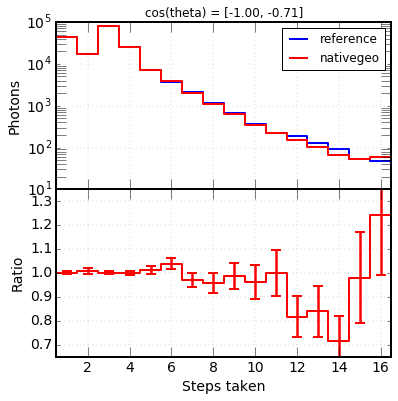

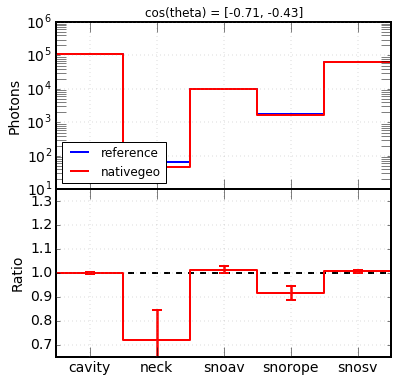

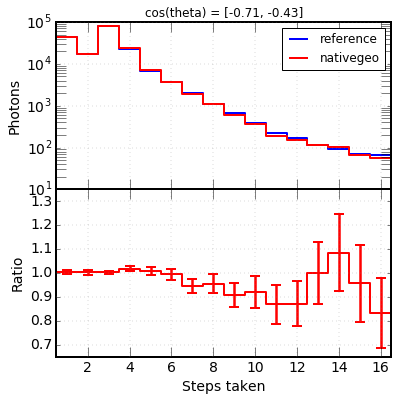

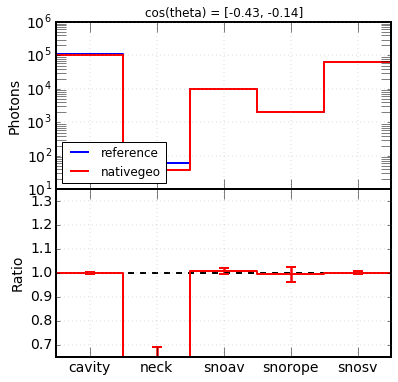

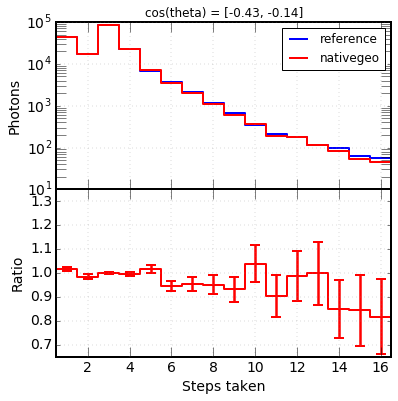

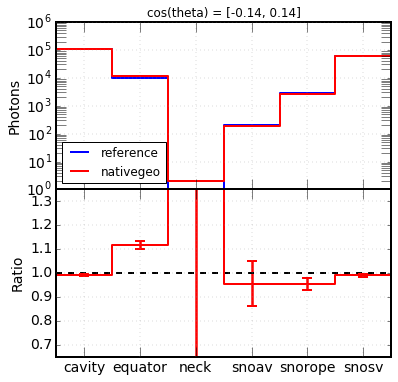

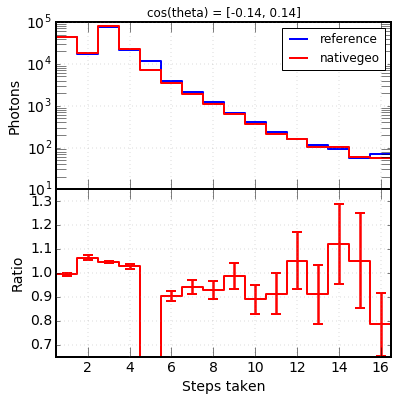

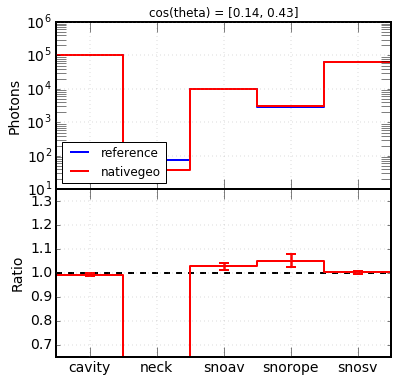

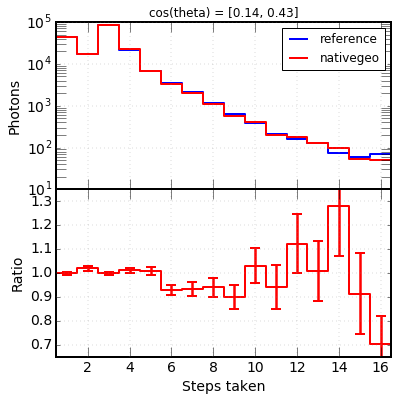

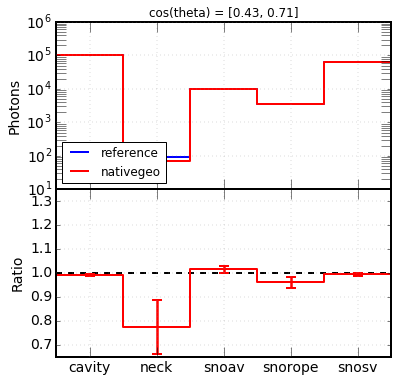

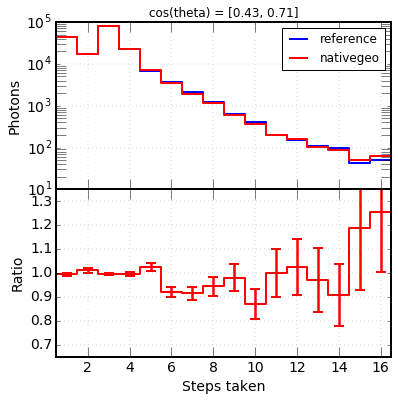

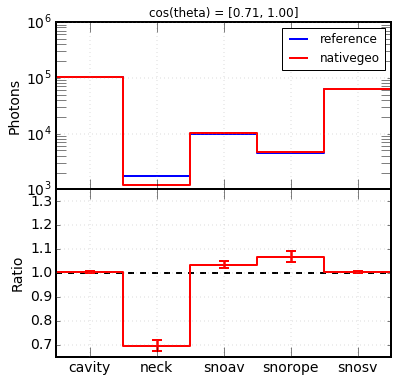

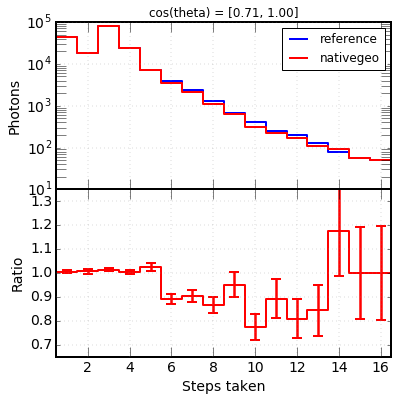

In [170]:
cosz_list = np.linspace(-1, 1, 8)
for i in range(len(cosz_list)-1):
    costheta_range = [cosz_list[i],cosz_list[i+1]]
    #print '\nRange ', costheta_range
    geo_studies.compareTracking(set_list = [reference, native],
                               costheta_range = costheta_range  ,
                                pltlabels=['reference','nativegeo'],
                               outdir=outdir)


[ 0.99959767  1.16788916  0.58632138  1.01989494  0.96218746  1.03601382]
[ 1.04569053  1.0417643   1.00834344  1.01030558  0.65630058  0.95882188
  0.85736801  0.89255225  0.95434917  0.96909765  0.96654275  0.91091954
  0.98412698  1.1257485   1.09625668  1.01459854]


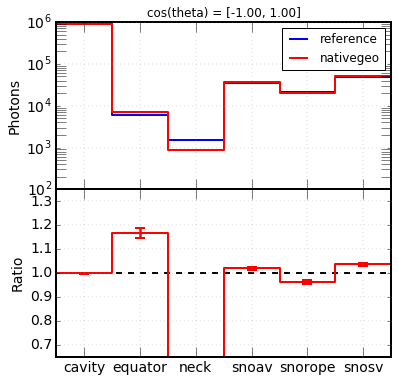

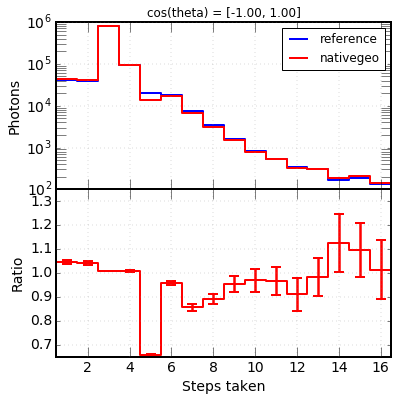

In [169]:
reload(geo_studies)
outdir = '/home/jp/projects/snoplus/reports/nativegeometry/newfigs/500nm'
geo_studies.compareTracking(set_list = [reference500, native500],
                                                       pltlabels=['reference','nativegeo'],
                           outdir=outdir)

ValueError: x and y must have same first dimension

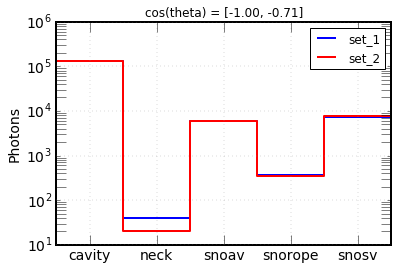

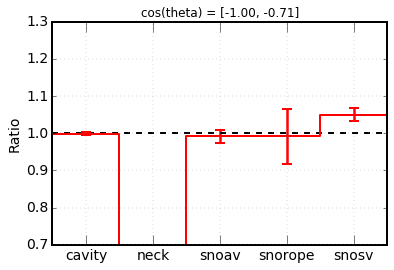

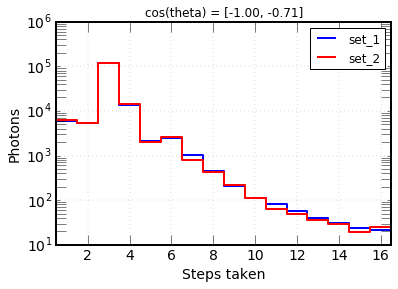

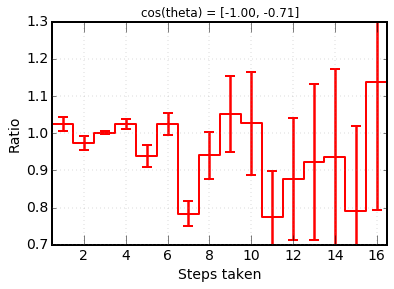

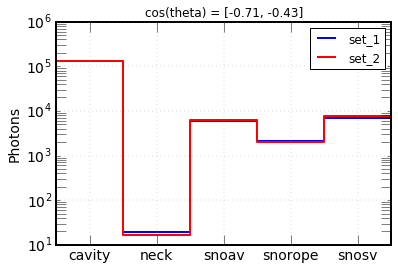

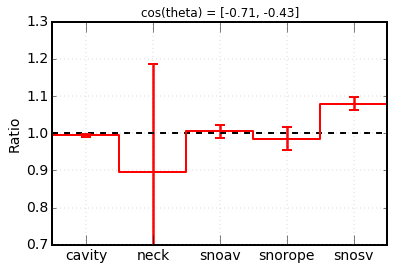

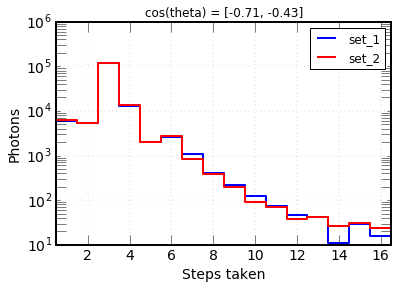

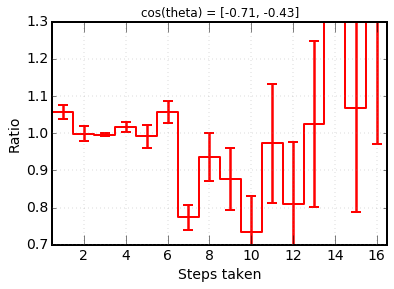

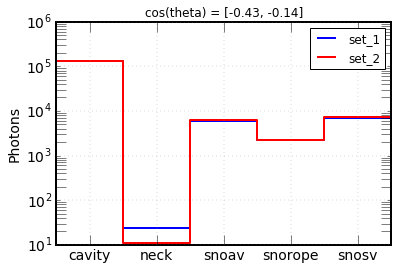

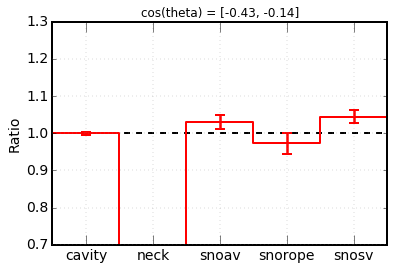

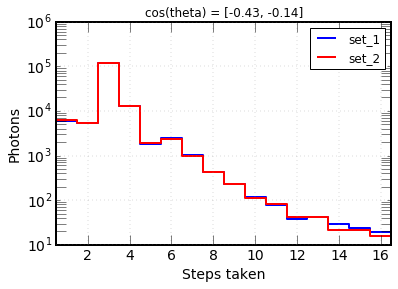

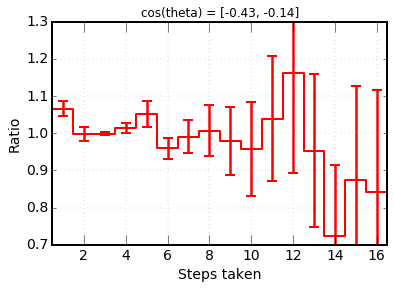

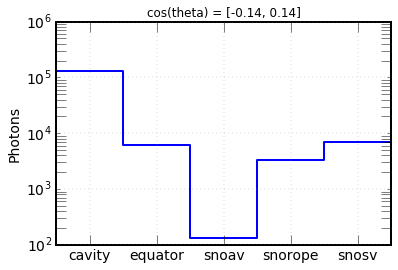

In [151]:
cosz_list = np.linspace(-1, 1, 8)
for i in range(len(cosz_list)-1):
    costheta_range = [cosz_list[i],cosz_list[i+1]]
    #print '\nRange ', costheta_range
    geo_studies.compareTracking(set_list = [reference500, native500],
                               costheta_range = costheta_range)


In [171]:
# Differences in acrylic
# Acrylic grey
ag_value1 = np.array([200.0, 220.0, 240.0, 260.0, 280.0, 300.0, 320.0, 340.0, 360.0, 380.0, 400.0, 420.0, 440.0, 460.0, 480.0, 500.0, 520.0, 540.0, 560.0, 580.0, 600.0, 620.0, 640.0, 660.0, 680.0, 700.0, 720.0, 740.0, 760.0, 780.0, 800.0])
ag_value2 = np.array([18.3, 20.5, 23.3, 27.1, 32.3, 40.0, 52.5, 76.1, 138.9, 264.7, 393.2, 528.4, 
                      538.6, 546.2, 557.6, 566.2, 568.1, 567.9, 566.0, 567.1, 566.5, 565.5, 565.7, 
                      566.1, 1000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0,])

as_value1 = np.array([200.0, 220.0, 240.0, 260.0, 280.0, 300.0, 310.0, 320.0, 330.0, 340.0, 350.0, 360.0, 380.0, 400.0, 420.0, 440.0, 450.0, 460.0, 480.0, 500.0, 520.0, 540.0, 560.0, 580.0, 600.0, 620.0, 640.0, 660.0, 680.0, 700.0, 720.0, 740.0, 760.0, 780.0, 800.0,])
as_value2 = np.array([0.249165, 0.249165, 0.249165, 0.249165, 2.39349, 22.9885, 69.9301, 100.0, 140.056, 200.0, 270.27, 380.228, 751.88, 1129.94, 1227.6, 1343.72, 1410.44, 1410.44, 1410.44, 1410.44, 1410.44, 1410.44, 1410.44, 1410.44, 1410.44, 1410.44, 1410.44, 1410.44, 1410.44, 1410.44, 1410.44, 1410.44, 1410.44, 1410.44, 1410.44,])

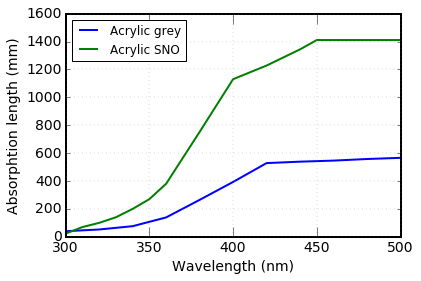

In [201]:
endb = 18
plt.plot(ag_value1[:endb], ag_value2[:endb], label='Acrylic grey')
plt.plot(as_value1, as_value2, label='Acrylic SNO')
plt.legend(loc=0)
plt.xlim([300, 500])
plt.axvline(x=500,ymax=1600, color='black')
plt.ylabel('Absorphtion length (mm)')
plt.xlabel('Wavelength (nm)')


In [199]:
280./750

0.37333333333333335

In [202]:
600./1400.

0.42857142857142855